In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from datetime import datetime

In [8]:
df=pd.read_csv("covid_tracking.csv")

In [3]:
df_copy=df.copy()

In [26]:
XD=df_copy.groupby("date",as_index=False).sum()
XD.head()

,date,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,death,hospitalized,total_test_results
0,2020-01-22,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2020-01-23,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2020-01-26,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [72]:
df_copy.columns

Index(['date', 'state', 'positive', 'negative', 'hospitalized_currently',
       'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative',
       'on_ventilator_currently', 'on_ventilator_cumulative',
       'data_quality_grade', 'death', 'hospitalized', 'total_test_results'],
      dtype='object')

In [12]:
df_copy.drop(['fips_code', 'iso_subdivision','last_update_et', 'death_increase','recovered','hash','total', 'date_checked','pending','pos_neg', 'fips', 'death_increase','load_time','hospitalized_increase', 'negative_increase', 'positive_increase','iso_country','total_test_results_increase'],axis=1,inplace=True)

In [14]:
# Mysubmission = df_copy
# Mysubmission.to_csv('covdata.csv', index=False)

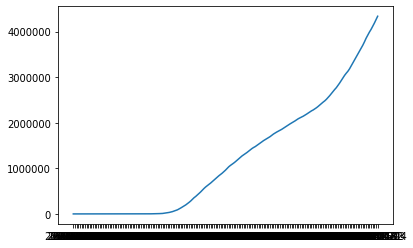

In [48]:
plt.plot(XD["date"],XD["positive"])
plt.show()

In [35]:
XDst=df_copy.groupby("state",as_index=False).count()

In [106]:
df_copy.sort_values("date",inplace=True)
df_copy.head()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,data_quality_grade,death,hospitalized,total_test_results
8482,2020-01-22,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8481,2020-01-23,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8480,2020-01-24,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8479,2020-01-25,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8478,2020-01-26,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274


In [107]:
df_copy.sort_values("state")
x=df_copy["state"].unique()
x

array(['WA', 'RI', 'MI', 'OR', 'NH', 'WI', 'TX', 'SC', 'NY', 'NC', 'IL',
       'GA', 'FL', 'CA', 'AZ', 'VA', 'TN', 'OH', 'NV', 'NJ', 'NE', 'MD',
       'CO', 'DC', 'VT', 'PA', 'WV', 'NM', 'KS', 'IA', 'KY', 'IN', 'MN',
       'AR', 'AK', 'DE', 'SD', 'UT', 'WY', 'MS', 'ND', 'OK', 'MT', 'ID',
       'MO', 'ME', 'LA', 'HI', 'CT', 'AL', 'MA', 'MP', 'VI', 'PR', 'GU',
       'AS'], dtype=object)

WA :


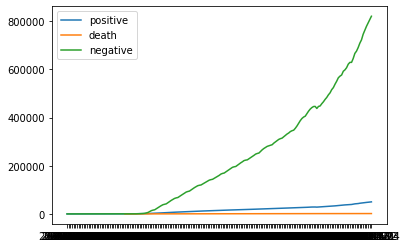

MI :


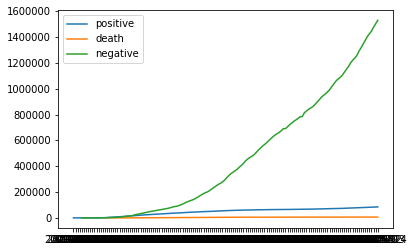

RI :


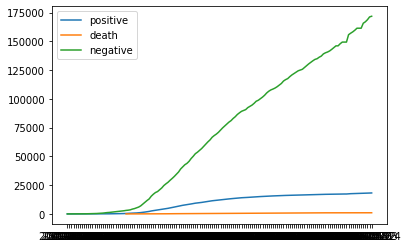

AZ :


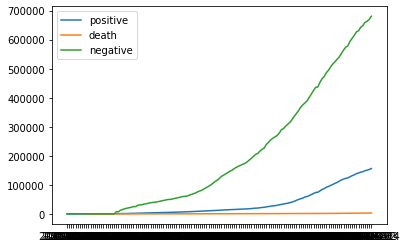

CA :


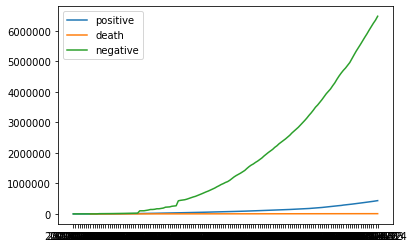

FL :


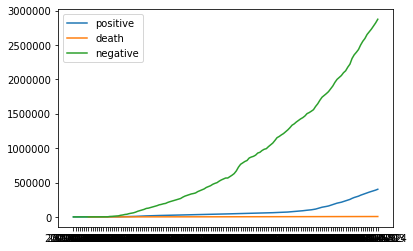

GA :


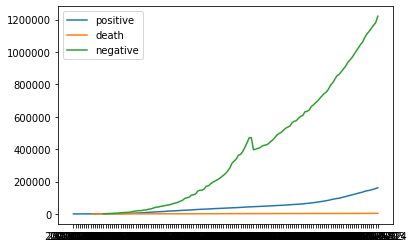

IL :


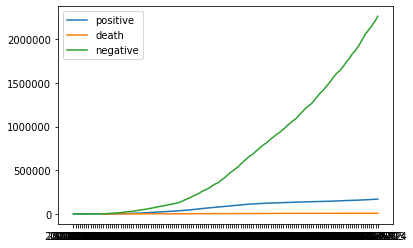

NC :


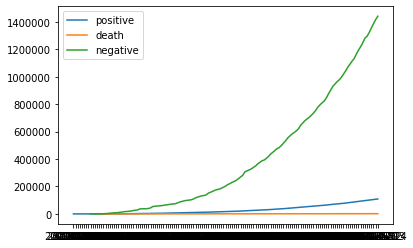

NY :


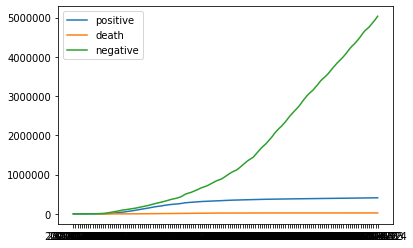

OR :


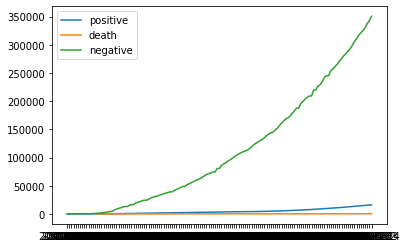

SC :


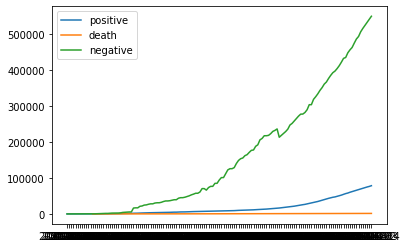

TX :


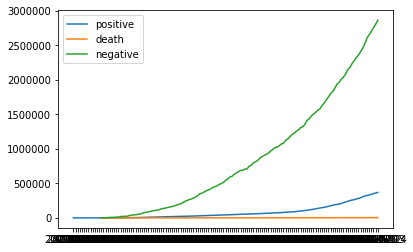

WI :


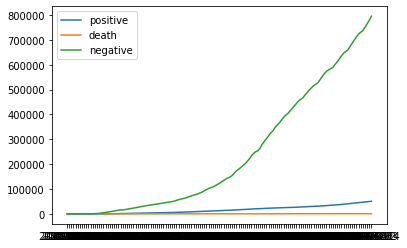

NH :


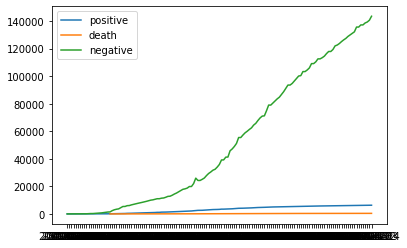

MD :


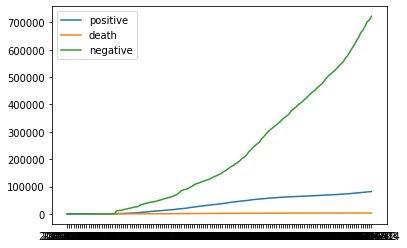

DC :


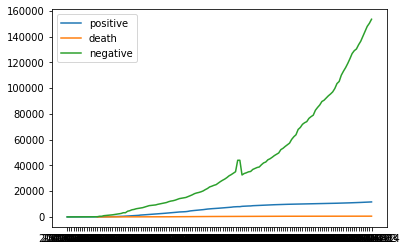

CO :


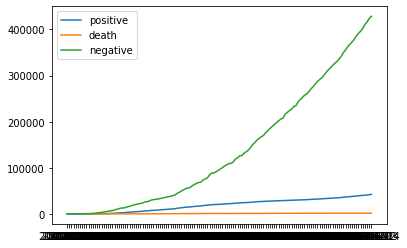

NE :


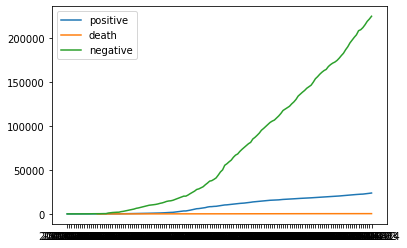

NJ :


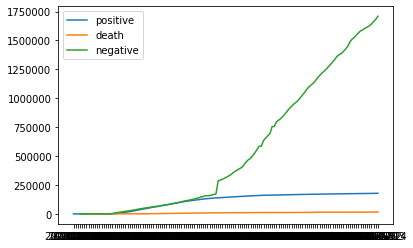

VA :


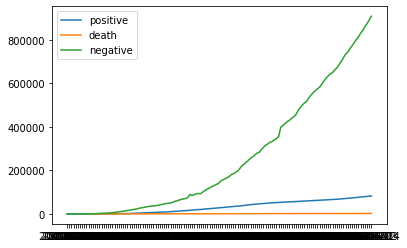

TN :


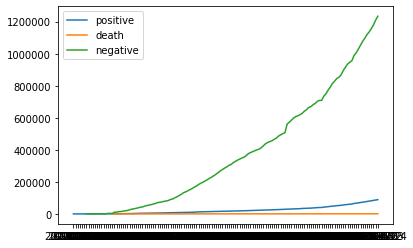

OH :


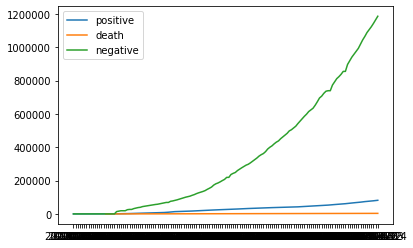

NV :


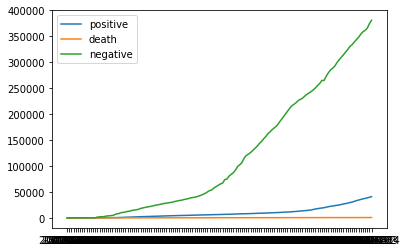

IA :


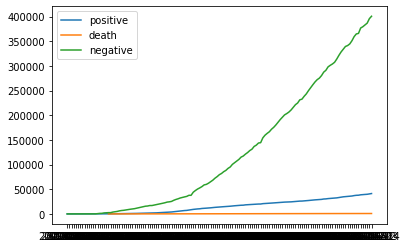

KY :


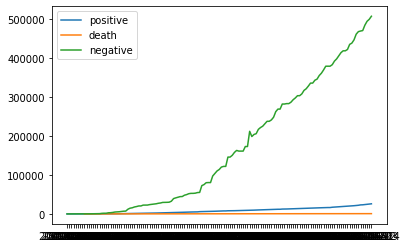

IN :


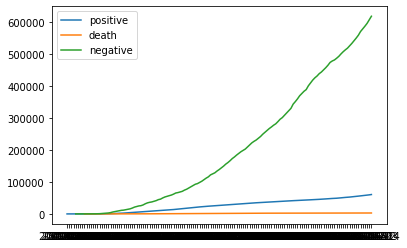

DE :


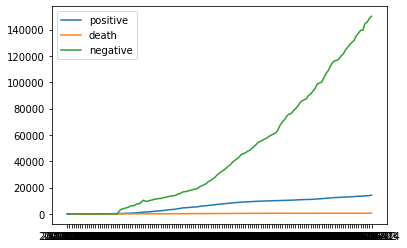

MN :


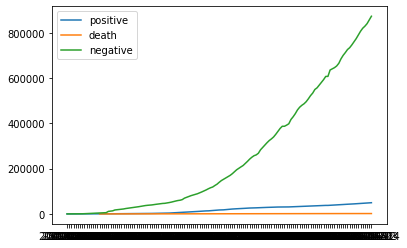

AR :


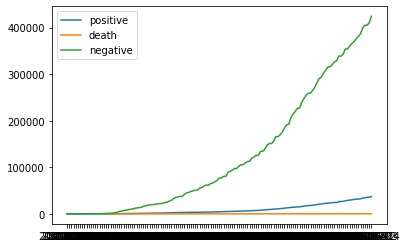

AK :


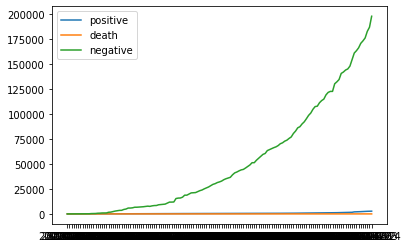

KS :


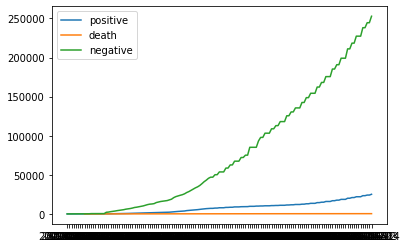

WV :


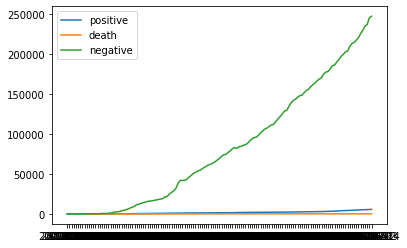

VT :


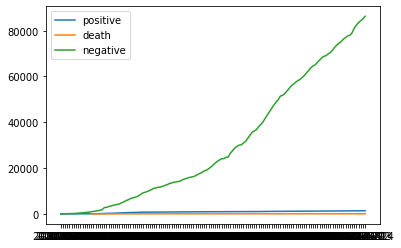

PA :


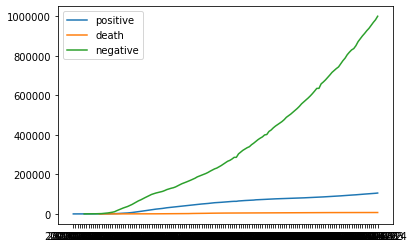

NM :


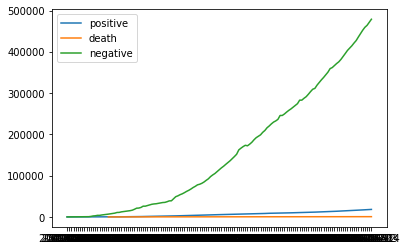

ID :


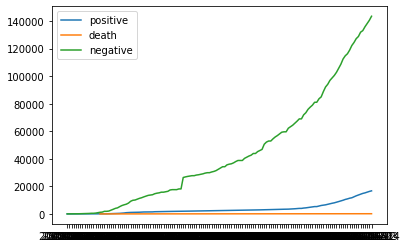

ME :


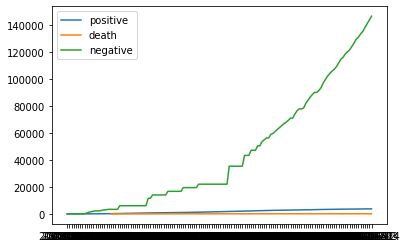

LA :


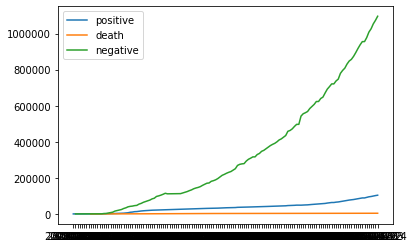

HI :


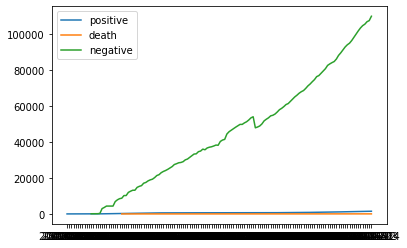

CT :


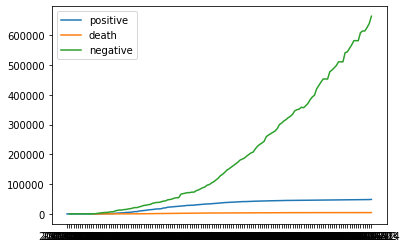

AL :


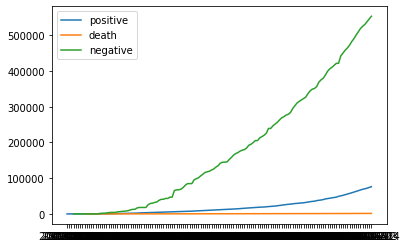

MO :


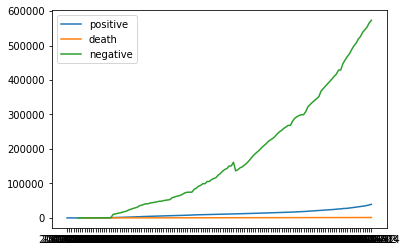

MT :


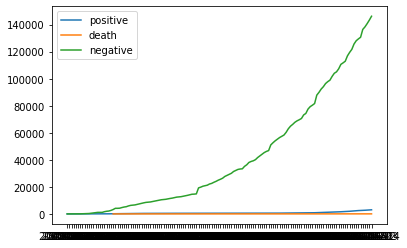

WY :


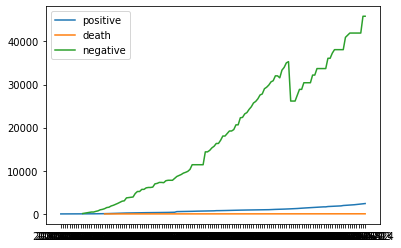

UT :


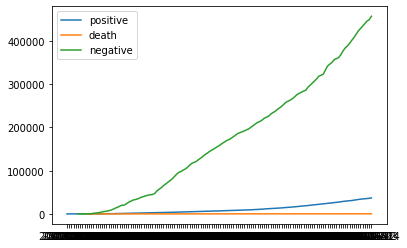

SD :


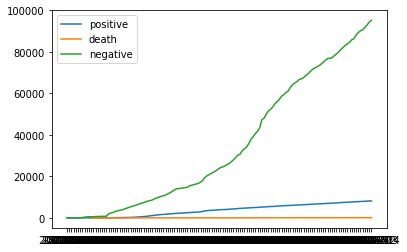

MS :


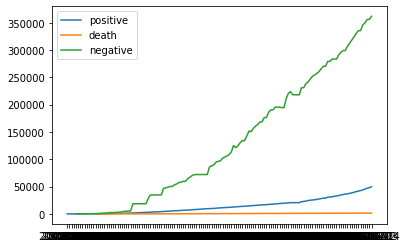

ND :


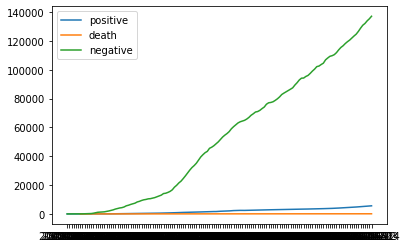

OK :


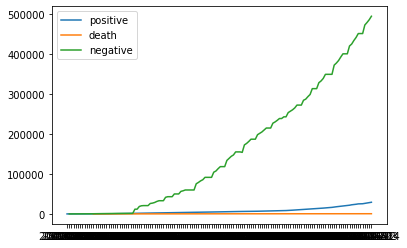

MA :


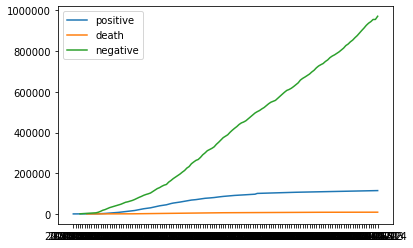

GU :


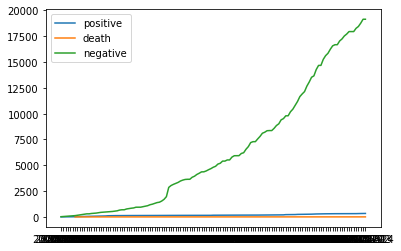

AS :


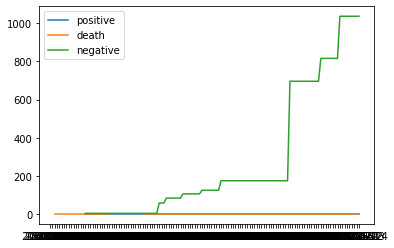

MP :


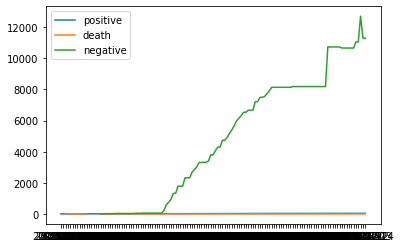

VI :


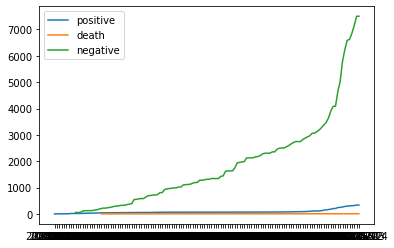

PR :


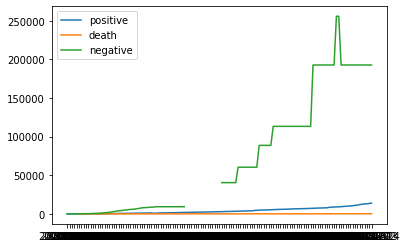

In [99]:
f=[]
i=1
# plt.figure(figsize=(100,70))
for d in x:
    dfd=df_copy[df_copy["state"]==d]
    print(d,":")
#     plt.subplot(14,4,i)
    plt.plot(dfd["date"],dfd["positive"])
    plt.plot(dfd["date"],dfd["death"])
    plt.plot(dfd["date"],dfd["negative"])
    plt.legend(["positive", "death","negative"], loc ="upper left")
    plt.show()

In [104]:
columnData=df_copy.columns.drop(['date','state','data_quality_grade'])
for x in columnData:
    df_copy[x]=np.sqrt(df_copy[x])
df_copy.head()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,data_quality_grade,death,hospitalized,total_test_results
8482,2020-01-22,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8481,2020-01-23,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8480,2020-01-24,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8479,2020-01-25,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274
8478,2020-01-26,WA,1.044274,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.044274


WA :


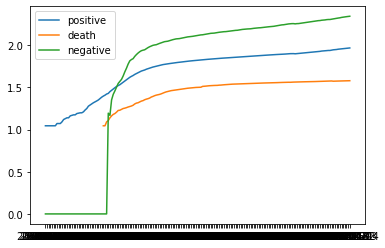

RI :


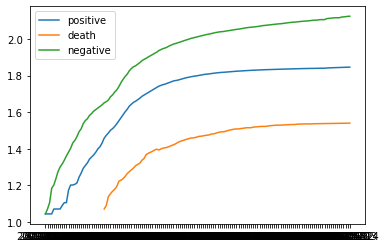

MI :


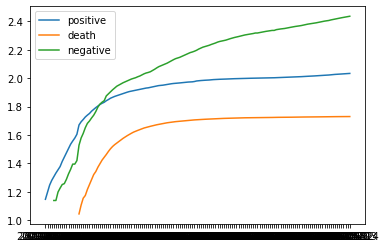

OR :


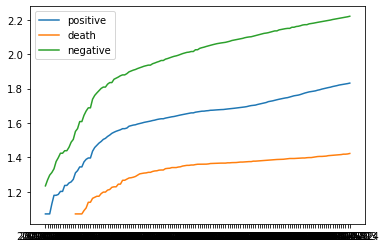

NH :


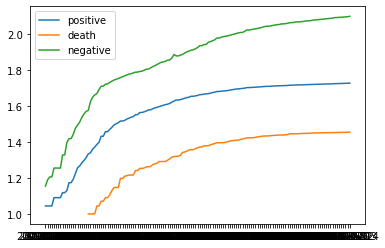

WI :


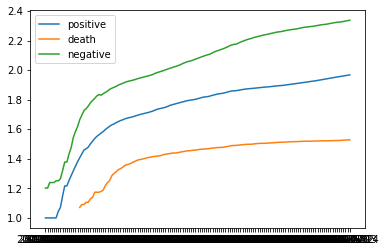

TX :


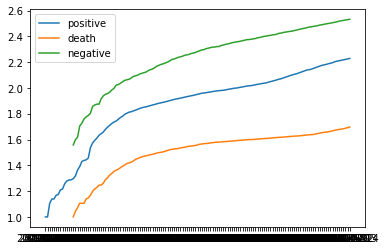

SC :


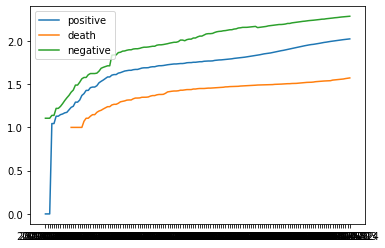

NY :


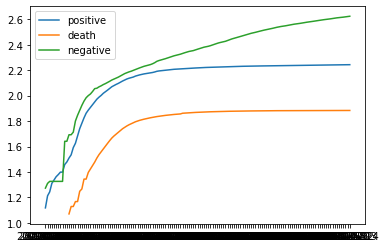

NC :


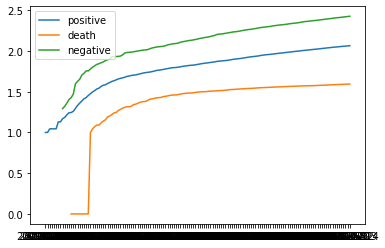

IL :


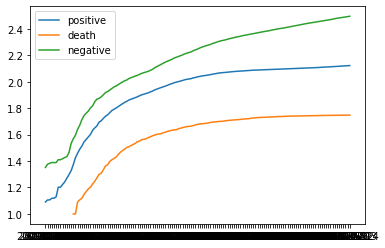

GA :


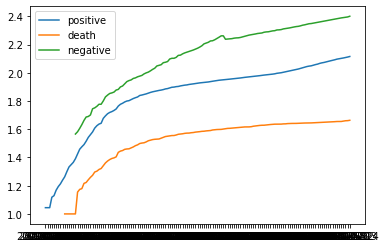

FL :


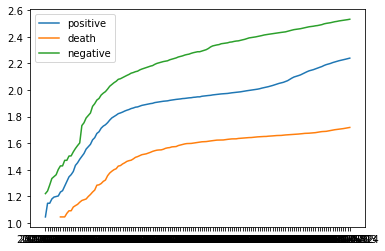

CA :


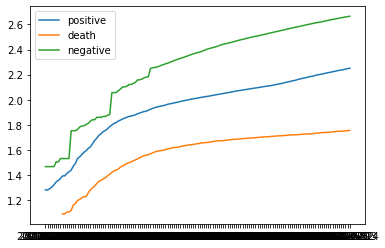

AZ :


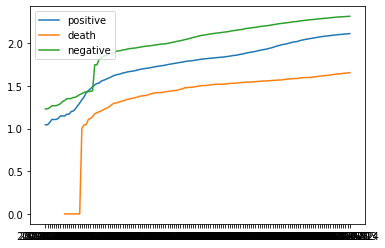

VA :


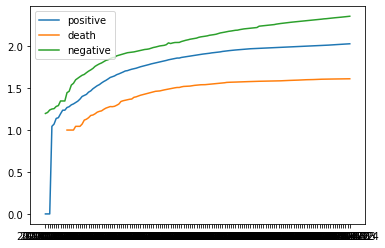

TN :


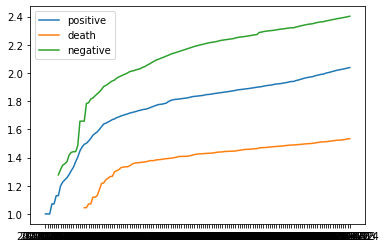

OH :


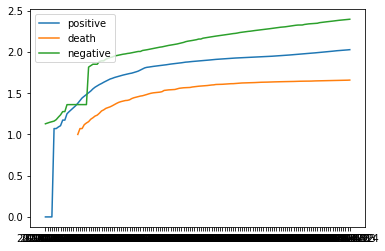

NV :


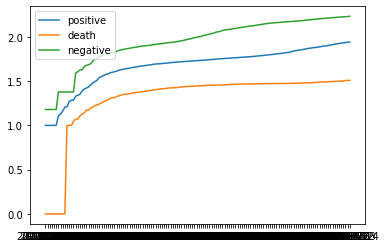

NJ :


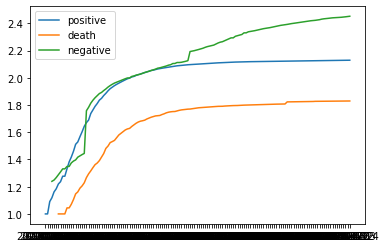

NE :


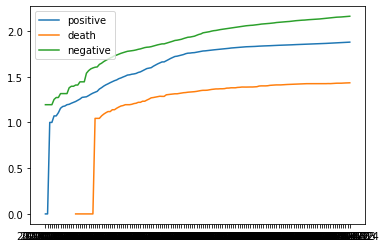

MD :


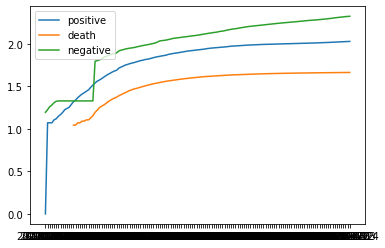

CO :


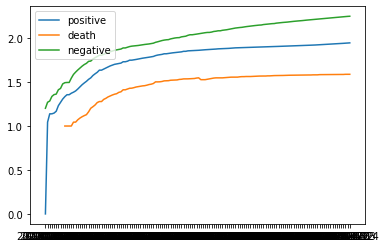

DC :


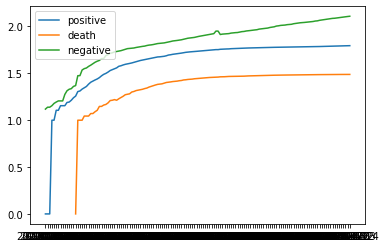

VT :


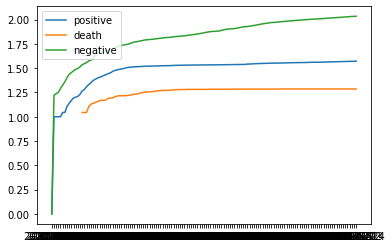

PA :


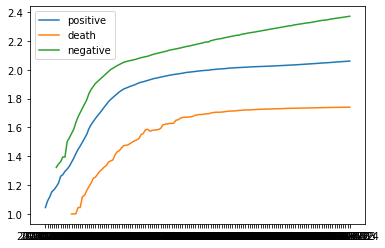

WV :


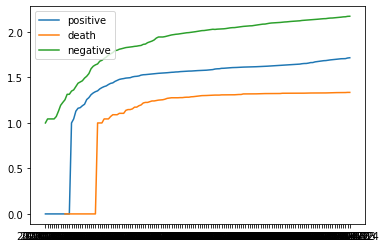

NM :


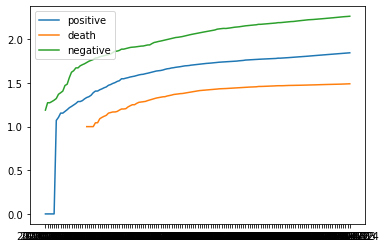

KS :


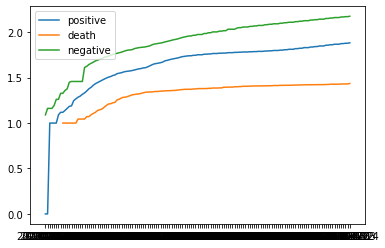

IA :


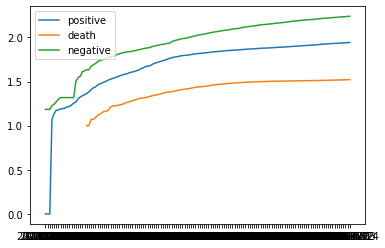

KY :


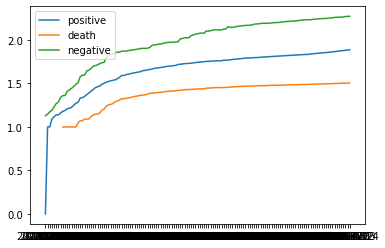

IN :


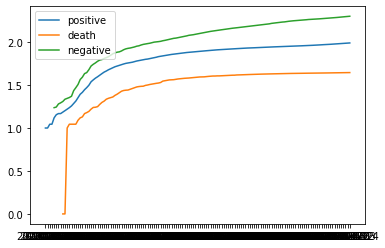

MN :


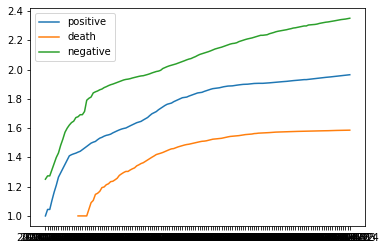

AR :


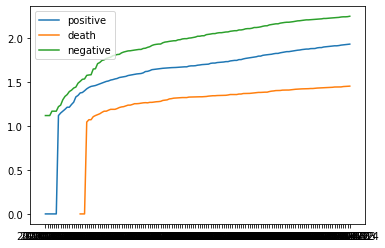

AK :


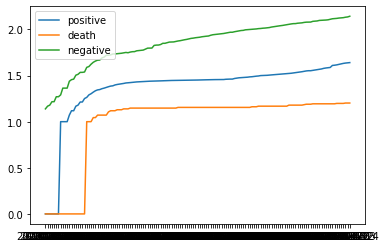

DE :


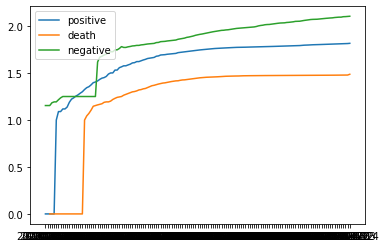

SD :


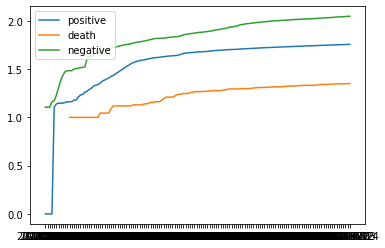

UT :


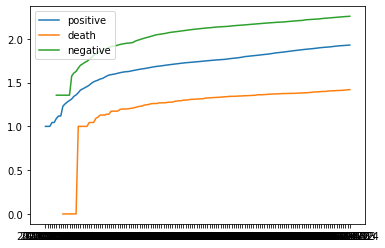

WY :


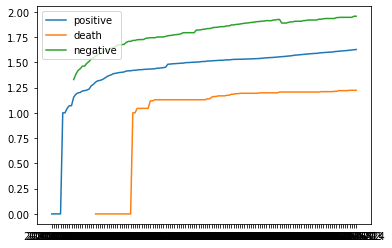

MS :


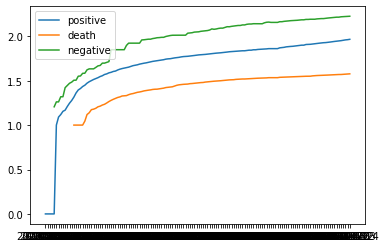

ND :


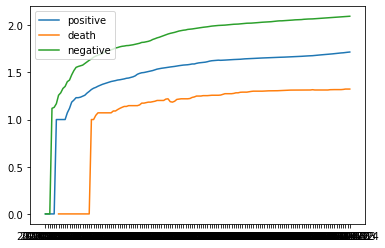

OK :


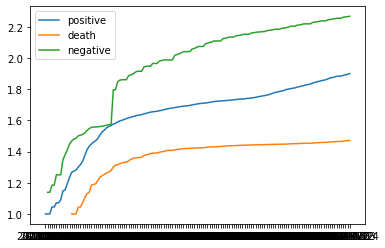

MT :


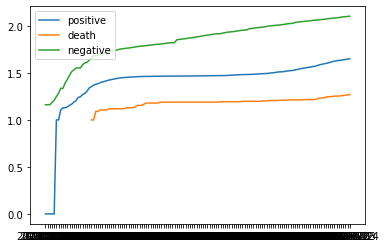

ID :


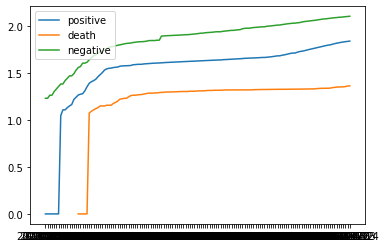

MO :


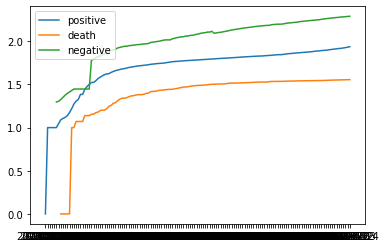

ME :


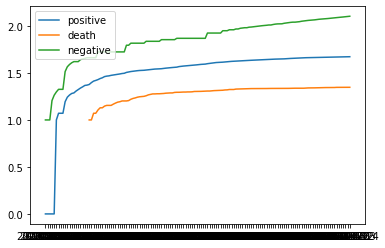

LA :


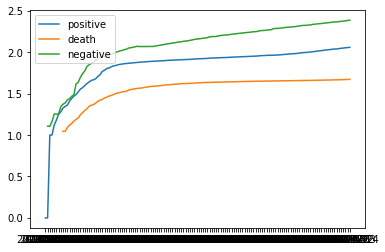

HI :


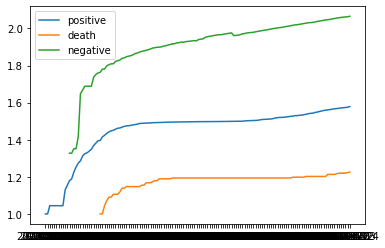

CT :


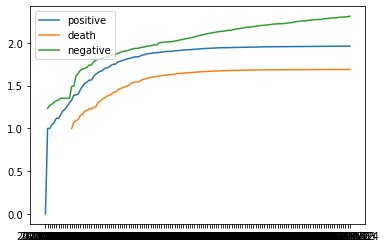

AL :


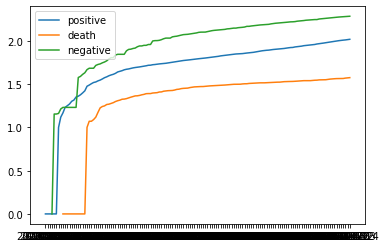

MA :


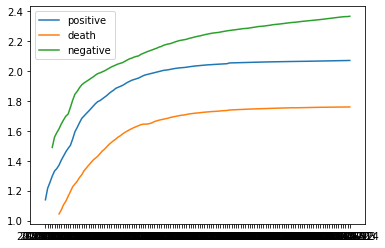

MP :


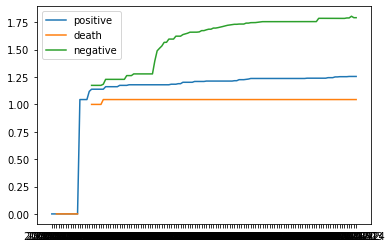

VI :


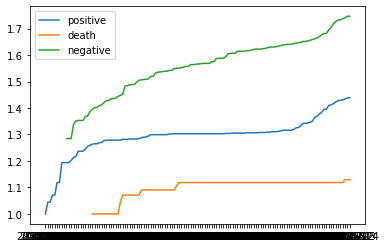

PR :


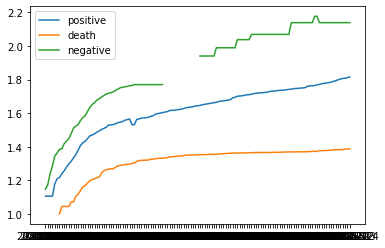

GU :


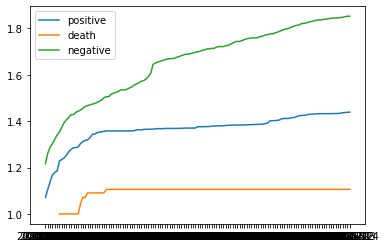

AS :


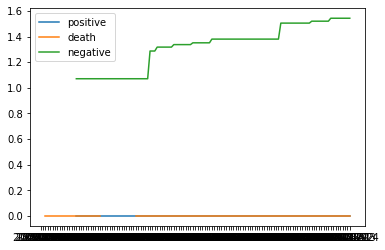

In [108]:
for d in x:
    dfd1=df_copy[df_copy["state"]==d]
    print(d,":")
#     plt.subplot(14,4,i)
    plt.plot(dfd1["date"],dfd1["positive"])
    plt.plot(dfd1["date"],dfd1["death"])
    plt.plot(dfd1["date"],dfd1["negative"])
    plt.legend(["positive", "death","negative"], loc ="upper left")
    plt.show()